Ensure that Runtime is set to CPU for all ML's. Set Runtime to GPU when running CNN

In [ ]:
import pandas as pd

In [ ]:
#CSV files can be found in project folder
df = pd.read_csv("/content/Project_Digits.csv")

In [5]:
print(df.iloc[ :, -1].unique()) #shows unique categories

[0 1 2 3 4 5 6 7 8 9]


In [6]:
print(df.iloc[ :, -1].value_counts()) #displays amount of each category

0.525
9    1009
0    1006
6    1004
7    1003
4    1001
5    1001
8    1001
1    1000
2    1000
3    1000
Name: count, dtype: int64


DecisionTreeClassifier(max_depth=15, max_features='sqrt', min_samples_leaf=6,
                       min_samples_split=6, random_state=42)
Accuracy: 0.8100


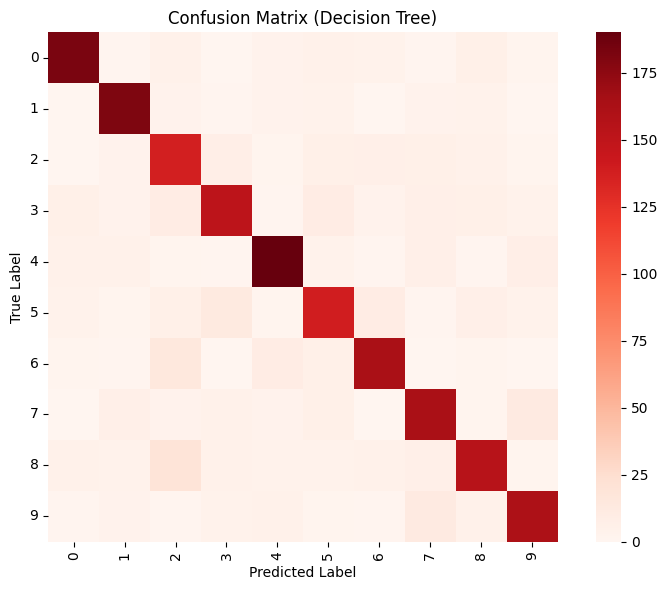


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       209
           1       0.86      0.91      0.89       199
           2       0.68      0.78      0.73       177
           3       0.80      0.75      0.78       202
           4       0.85      0.85      0.85       224
           5       0.75      0.74      0.74       188
           6       0.84      0.82      0.83       199
           7       0.79      0.81      0.80       201
           8       0.80      0.73      0.77       211
           9       0.83      0.83      0.83       195

    accuracy                           0.81      2005
   macro avg       0.81      0.81      0.81      2005
weighted avg       0.81      0.81      0.81      2005

Train accuracy: 0.8980
Test  accuracy: 0.8100
Train-Test gap: 0.0880


In [7]:
# @title
#Decision Tree

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# fetch dataset and converts to Dataframe
df = pd.read_csv("/content/Project_Digits.csv")

# data (as pandas dataframes)
x = df.iloc[ :, :-1] #removes the last column as this will be the Labels

y = df.iloc[ :, -1].astype(str).str.strip().str.upper() #seperates the Labels

#splits data into train and test
x_train, x_test, y_train, y_test = train_test_split (
    x,
    y,
    test_size = 0.2,
    random_state = 42
    )

#flattens y train and test to 1D
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

#Decision Tree Model
DT_model = DecisionTreeClassifier(max_depth=15, min_samples_split=6, max_features='sqrt', min_samples_leaf=6, random_state=42,)

model = DT_model
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f"{model}") #prints out the model
print(f"Accuracy: {acc:.4f}") #prints out the accuracy score

#This is where the confusion Matrix is created
class_names = np.unique(y_test)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    cmap="Reds",
    xticklabels=class_names,
    yticklabels=class_names,
    square=True,
    cbar=True
)

#various labels and information about the matrix
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Decision Tree)")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#ML Overfitting check
train_acc = model.score(x_train, y_train)
test_acc  = model.score(x_test, y_test)

print(f"Train accuracy: {train_acc:.4f}") #Accuracy of the training
print(f"Test  accuracy: {test_acc:.4f}") #Accuracy of the test on unseen data
Overfitting = train_acc - test_acc
print(f"Train-Test gap: {Overfitting:.4f}")

RandomForestClassifier(max_depth=16, n_estimators=310, random_state=42)
Accuracy: 0.9711


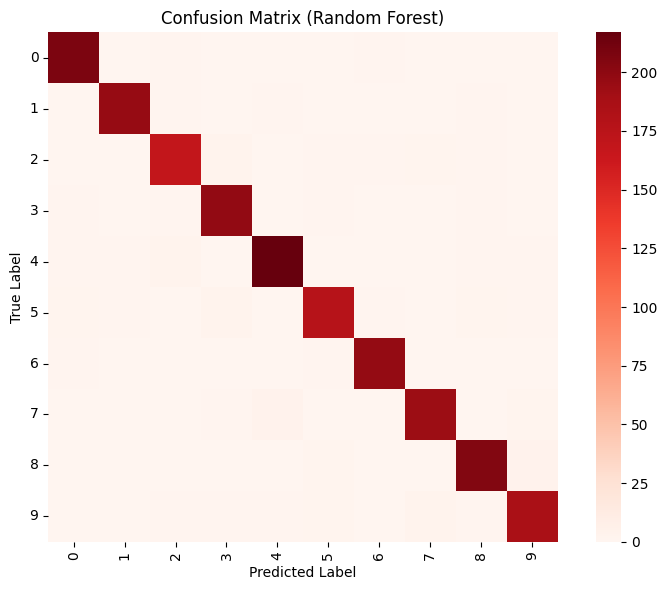


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       209
           1       0.99      0.98      0.99       199
           2       0.96      0.95      0.96       177
           3       0.96      0.98      0.97       202
           4       0.97      0.97      0.97       224
           5       0.96      0.95      0.95       188
           6       0.98      0.99      0.99       199
           7       0.97      0.97      0.97       201
           8       0.97      0.97      0.97       211
           9       0.96      0.95      0.96       195

    accuracy                           0.97      2005
   macro avg       0.97      0.97      0.97      2005
weighted avg       0.97      0.97      0.97      2005

Train accuracy: 1.0000
Test  accuracy: 0.9711
Train-Test gap: 0.0289


In [8]:
# @title
#Random Forest

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# fetch dataset
df = pd.read_csv("/content/Project_Digits.csv")
#need to drop the top row also

# data (as pandas dataframes)
x = df.iloc[ :, :-1] #removes the last column as this will be the Labels

y = df.iloc[ :, -1].astype(str).str.strip().str.upper() #seperates the Labels

x_train, x_test, y_train, y_test = train_test_split (
    x,
    y,
    test_size = 0.2,
    random_state = 42
    )

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

#Random Forest Model
RF_model = RandomForestClassifier(n_estimators=310, max_depth=16, random_state=42) #9726

model = RF_model
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f"{model}")
print(f"Accuracy: {acc:.4f}")
class_names = np.unique(y_test)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    cmap="Reds",
    xticklabels=class_names,
    yticklabels=class_names,
    square=True,
    cbar=True
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Random Forest)")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#ML Overfitting check
train_acc = model.score(x_train, y_train)
test_acc  = model.score(x_test, y_test)

print(f"Train accuracy: {train_acc:.4f}") #Accuracy of the training
print(f"Test  accuracy: {test_acc:.4f}") #Accuracy of the test on unseen data
Overfitting = train_acc - test_acc
print(f"Train-Test gap: {Overfitting:.4f}")

HistGradientBoostingClassifier(max_depth=4, max_iter=150, max_leaf_nodes=11,
                               random_state=42)
Accuracy: 0.9771


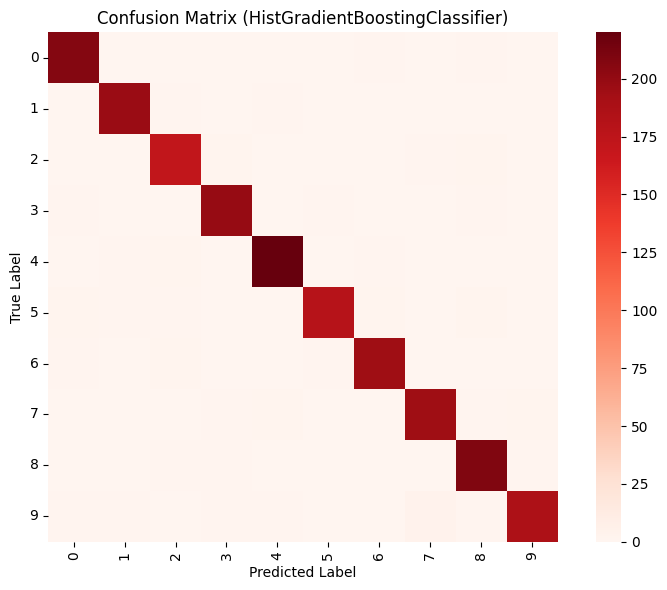


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       209
           1       0.98      0.99      0.99       199
           2       0.96      0.97      0.97       177
           3       0.98      0.99      0.98       202
           4       0.98      0.98      0.98       224
           5       0.99      0.96      0.97       188
           6       0.98      0.98      0.98       199
           7       0.97      0.97      0.97       201
           8       0.96      0.99      0.97       211
           9       0.98      0.95      0.97       195

    accuracy                           0.98      2005
   macro avg       0.98      0.98      0.98      2005
weighted avg       0.98      0.98      0.98      2005

Train accuracy: 1.0000
Test  accuracy: 0.9771
Train-Test gap: 0.0229


In [9]:
# @title
#HistGradientBoostingClassifier

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# fetch dataset
df = pd.read_csv("/content/Project_Digits.csv")
#need to drop the top row also

# data (as pandas dataframes)
x = df.iloc[ :, :-1] #removes the last column as this will be the Labels

y = df.iloc[ :, -1].astype(str).str.strip().str.upper() #seperates the Labels

x_train, x_test, y_train, y_test = train_test_split (
    x,
    y,
    test_size = 0.2,
    random_state = 42
    )

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

#HistGradientBoostingClassifier
HistBoost_model = HistGradientBoostingClassifier(random_state = 42, max_iter=150, max_leaf_nodes=11, max_depth=4) #.9766

model = HistBoost_model
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f"{model}")
print(f"Accuracy: {acc:.4f}")
class_names = np.unique(y_test)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    cmap="Reds",
    xticklabels=class_names,
    yticklabels=class_names,
    square=True,
    cbar=True
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (HistGradientBoostingClassifier)")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#ML Overfitting check
train_acc = model.score(x_train, y_train)
test_acc  = model.score(x_test, y_test)

print(f"Train accuracy: {train_acc:.4f}") #Accuracy of the training
print(f"Test  accuracy: {test_acc:.4f}") #Accuracy of the test on unseen data
Overfitting = train_acc - test_acc
print(f"Train-Test gap: {Overfitting:.4f}")

KNeighborsClassifier(n_neighbors=1)
Accuracy: 0.9446


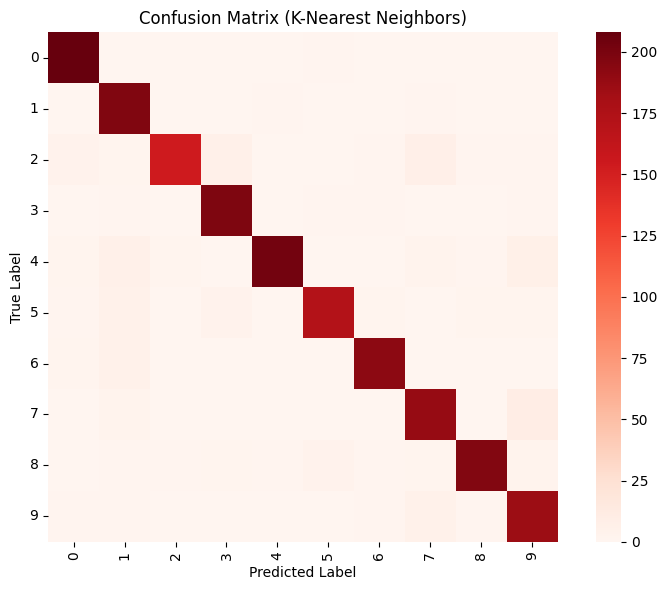


Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       209
           1       0.89      0.99      0.94       199
           2       0.98      0.87      0.92       177
           3       0.94      0.98      0.96       202
           4       0.99      0.91      0.95       224
           5       0.97      0.91      0.94       188
           6       0.97      0.96      0.97       199
           7       0.91      0.94      0.92       201
           8       0.98      0.93      0.95       211
           9       0.89      0.95      0.92       195

    accuracy                           0.94      2005
   macro avg       0.95      0.94      0.94      2005
weighted avg       0.95      0.94      0.94      2005

Train accuracy: 1.0000
Test  accuracy: 0.9446
Train-Test gap: 0.0554


In [10]:
# @title
#K-Nearest Neighbors

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# fetch dataset
df = pd.read_csv("/content/Project_Digits.csv")
#need to drop the top row also

# data (as pandas dataframes)
x = df.iloc[ :, :-1] #removes the last column as this will be the Labels

y = df.iloc[ :, -1].astype(str).str.strip().str.upper() #seperates the Labels

x_train, x_test, y_train, y_test = train_test_split (
    x,
    y,
    test_size = 0.2,
    random_state = 42
    )

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

#Scaler helps standardization
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#K-Nearest Neighbors
KNN = KNeighborsClassifier(n_neighbors=1)

model = KNN
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f"{model}")
print(f"Accuracy: {acc:.4f}")
class_names = np.unique(y_test)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    cmap="Reds",
    xticklabels=class_names,
    yticklabels=class_names,
    square=True,
    cbar=True
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (K-Nearest Neighbors)")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#ML Overfitting check
train_acc = model.score(x_train, y_train)
test_acc  = model.score(x_test, y_test)

print(f"Train accuracy: {train_acc:.4f}") #Accuracy of the training
print(f"Test  accuracy: {test_acc:.4f}") #Accuracy of the test on unseen data
Overfitting = train_acc - test_acc
print(f"Train-Test gap: {Overfitting:.4f}")

SVC(kernel='poly', random_state=42)
Accuracy: 0.9661


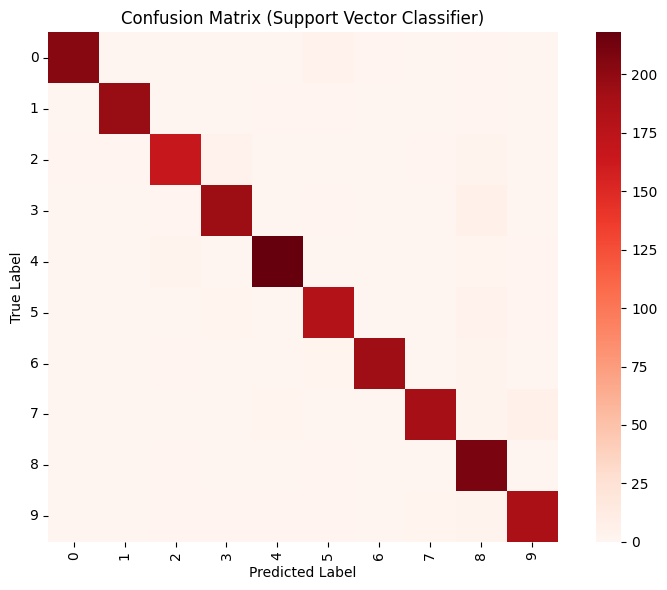


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       209
           1       0.99      0.98      0.99       199
           2       0.96      0.94      0.95       177
           3       0.97      0.96      0.96       202
           4       0.98      0.97      0.98       224
           5       0.95      0.96      0.96       188
           6       0.99      0.97      0.98       199
           7       0.98      0.95      0.96       201
           8       0.89      0.99      0.94       211
           9       0.96      0.95      0.96       195

    accuracy                           0.97      2005
   macro avg       0.97      0.97      0.97      2005
weighted avg       0.97      0.97      0.97      2005

Train accuracy: 0.9973
Test  accuracy: 0.9661
Train-Test gap: 0.0312


In [11]:
# @title
#Support Vector Classifier

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# fetch dataset
df = pd.read_csv("/content/Project_Digits.csv")
#need to drop the top row also

# data (as pandas dataframes)
x = df.iloc[ :, :-1] #removes the last column as this will be the Labels

y = df.iloc[ :, -1].astype(str).str.strip().str.upper() #seperates the Labels

x_train, x_test, y_train, y_test = train_test_split (
    x,
    y,
    test_size = 0.2,
    random_state = 42
    )

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

SVC_model = SVC(random_state = 42, kernel='poly', max_iter=-1) #.9656

model = SVC_model
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f"{model}")
print(f"Accuracy: {acc:.4f}")
class_names = np.unique(y_test)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    cmap="Reds",
    xticklabels=class_names,
    yticklabels=class_names,
    square=True,
    cbar=True
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Support Vector Classifier)")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#ML Overfitting check
train_acc = model.score(x_train, y_train)
test_acc  = model.score(x_test, y_test)

print(f"Train accuracy: {train_acc:.4f}") #Accuracy of the training
print(f"Test  accuracy: {test_acc:.4f}") #Accuracy of the test on unseen data
Overfitting = train_acc - test_acc
print(f"Train-Test gap: {Overfitting:.4f}")

LogisticRegression(C=0.1, max_iter=500, random_state=42)
Accuracy: 0.9411


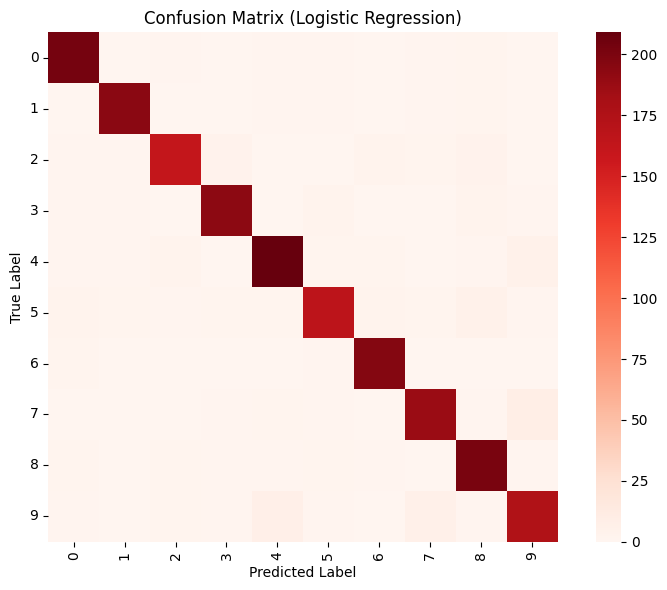


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       209
           1       0.97      0.97      0.97       199
           2       0.95      0.92      0.93       177
           3       0.96      0.96      0.96       202
           4       0.93      0.93      0.93       224
           5       0.93      0.89      0.91       188
           6       0.96      0.98      0.97       199
           7       0.94      0.93      0.94       201
           8       0.91      0.95      0.93       211
           9       0.91      0.90      0.90       195

    accuracy                           0.94      2005
   macro avg       0.94      0.94      0.94      2005
weighted avg       0.94      0.94      0.94      2005

Train accuracy: 1.0000
Test  accuracy: 0.9411
Train-Test gap: 0.0589


In [12]:
# @title
#Logistic Regression

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# fetch dataset
df = pd.read_csv("/content/Project_Digits.csv")
#need to drop the top row also

# data (as pandas dataframes)
x = df.iloc[ :, :-1] #removes the last column as this will be the Labels

y = df.iloc[ :, -1].astype(str).str.strip().str.upper() #seperates the Labels

x_train, x_test, y_train, y_test = train_test_split (
    x,
    y,
    test_size = 0.2,
    random_state = 42
    )

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

LR_model = LogisticRegression(random_state = 42, max_iter = 500, C=.1)

model = LR_model
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f"{model}")
print(f"Accuracy: {acc:.4f}")
class_names = np.unique(y_test)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    cmap="Reds",
    xticklabels=class_names,
    yticklabels=class_names,
    square=True,
    cbar=True
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Logistic Regression)")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#ML Overfitting check
train_acc = model.score(x_train, y_train)
test_acc  = model.score(x_test, y_test)

print(f"Train accuracy: {train_acc:.4f}") #Accuracy of the training
print(f"Test  accuracy: {test_acc:.4f}") #Accuracy of the test on unseen data
Overfitting = train_acc - test_acc
print(f"Train-Test gap: {Overfitting:.4f}")

In [1]:
#Connects Colab and Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp -r /content/drive/MyDrive/Project_Images/Digits /content/Digits
#bash command not python ! is very important
#Downloads the images directly to Colab

Found 8020 validated image filenames belonging to 10 classes.
Found 2006 validated image filenames belonging to 10 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 15s 104ms/step - accuracy: 0.6809 - loss: 0.9643 - val_accuracy: 0.9487 - val_loss: 0.1546
Epoch 2/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 19s 92ms/step - accuracy: 0.9758 - loss: 0.0771 - val_accuracy: 0.9826 - val_loss: 0.0593
Epoch 3/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 21s 99ms/step - accuracy: 0.9910 - loss: 0.0371 - val_accuracy: 0.9890 - val_loss: 0.0362
Epoch 4/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.9932 - loss: 0.0254 - val_accuracy: 0.9900 - val_loss: 0.0469
Epoch 5/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.9975 - loss: 0.0104 - val_accuracy: 0.9885 - val_loss: 0.0512
Epoch 6/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 12s 99ms/step - accuracy: 0.9974 - loss: 0.0078 - val_accuracy: 0.9920 - val_loss: 0.0399
Epoch 7/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.9958 - loss: 0.0127 - val_accuracy: 0.9910 - val_loss: 0.0401
Epoch 8/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 12s 99ms/step - accuracy: 0.9993 - loss: 0.0031 -

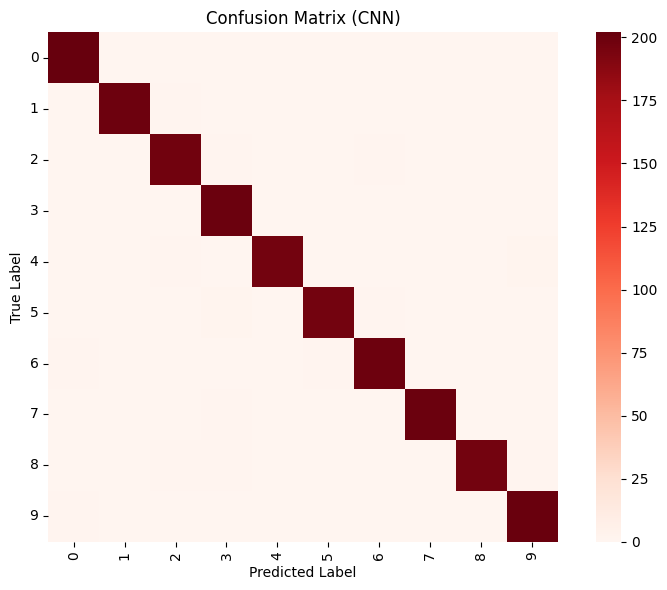


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       202
           1       1.00      0.99      1.00       200
           2       0.99      0.99      0.99       200
           3       0.98      1.00      0.99       200
           4       1.00      0.98      0.99       200
           5       0.99      0.98      0.99       200
           6       0.99      0.99      0.99       201
           7       1.00      1.00      1.00       201
           8       1.00      0.98      0.99       200
           9       0.99      1.00      0.99       202

    accuracy                           0.99      2006
   macro avg       0.99      0.99      0.99      2006
weighted avg       0.99      0.99      0.99      2006

Train accuracy: 1.0000
Test  accuracy: 0.9920
Train-Test gap: 0.0080


In [3]:
# CNN

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, mixed_precision
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import os
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Introduces a seed to reduce randomness and help repeatability
SEED = 42 #could be any number but 42 is standard
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

os.environ['TF_DETERMINISTIC_OPS'] = '1'

mixed_precision.set_global_policy('float32') #also helps to ensure repeatability

data_dir = "/content/Digits"  # Folder containing all labelled subfolders, need to seperate folders

image_size = (32, 32) #images already this size
batch_size = 64 #how many images get processed each time
test_split = 0.2 #testing sample

image_paths = [] #This tells the images where to go
labels = [] #This tells the labels where to go

#Below code takes the newly downloaded images from their folder and places them in the above lists
for label in sorted(os.listdir(data_dir)):
    folder = os.path.join(data_dir, label)
    if not os.path.isdir(folder):
        continue
    for f in os.listdir(folder):
        if f.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(folder, f))
            labels.append(label)

#This is where the data is split into train and test groups
train_paths, test_paths, train_labels, test_labels = train_test_split(
    image_paths, labels, test_size=test_split, stratify=labels, random_state=42
)

#The train and test groups are turned into data frames
train_df = pd.DataFrame({'filename': train_paths, 'class': train_labels})
test_df  = pd.DataFrame({'filename': test_paths,  'class': test_labels})

#normalising images
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

#training data processed here
train_data = train_datagen.flow_from_dataframe(
    train_df,
    x_col='filename',
    y_col='class',
    target_size=image_size,
    class_mode='categorical',
    color_mode='rgb',
    batch_size=batch_size,
    seed=SEED,
    shuffle=False
)

#test data is processed here
test_data = test_datagen.flow_from_dataframe(
    test_df,
    x_col='filename',
    y_col='class',
    target_size=image_size,
    class_mode='categorical',
    color_mode='rgb',
    batch_size=batch_size,
    seed=SEED,
    shuffle=False
)

#Number of classes
num_classes = len(train_data.class_indices)

# CNN model, 2 convolutional layers, 1 dense layer
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax', dtype='float32')
])

# Compile and train the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) #Accuracy is our primary measurement

model.fit (train_data,
           epochs = 10, #the CNN will run 10 times to maximize results, learning from each epoch
           validation_data=test_data)

loss, acc = model.evaluate(test_data)

print(f"Test Accuracy: {acc:.4f}")

#Needed for Classification report
y_pred_probs = model.predict(test_data)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_data.classes
class_names = list(test_data.class_indices.keys())

#confusion matrix will show us where the model is going wrong, if there are any classes that are causing issues
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    cmap="Reds",
    xticklabels=class_names,
    yticklabels=class_names,
    square=True,
    cbar=True
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (CNN)")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

#Overfitting check for CNN
train_loss, train_acc = model.evaluate(train_data, verbose=0)
test_loss,  test_acc  = model.evaluate(test_data, verbose=0)

print(f"Train accuracy: {train_acc:.4f}") #Accuracy of the training
print(f"Test  accuracy: {test_acc:.4f}") #Accuracy of the test on unseen data
Overfitting = train_acc - test_acc
print(f"Train-Test gap: {Overfitting:.4f}") #Results shows % of over/under fitting


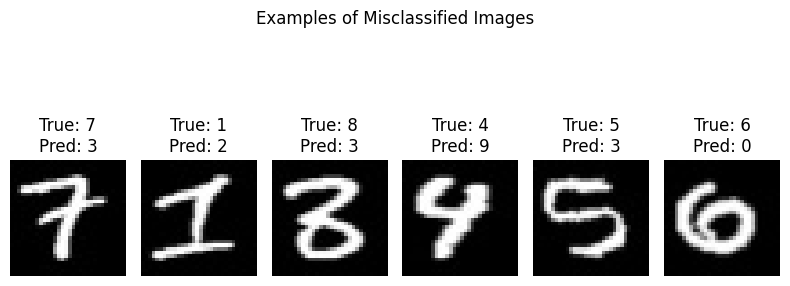

In [11]:
#Examples of misclassified images

misclassified_idx = np.where(y_pred != y_true)[0]
np.random.shuffle(misclassified_idx)

error_examples = min(6, len(misclassified_idx)) #selects 6 examples of misclassified images
plt.figure(figsize=(8, 4)) #size images will appear

for i, idx in enumerate(misclassified_idx[:error_examples]):
    # loads images
    img_path = test_df.iloc[idx]['filename']
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=image_size)
    img = tf.keras.preprocessing.image.img_to_array(img)

    true_label = class_names[y_true[idx]] #real label
    pred_label = class_names[y_pred[idx]] #predicted label

    plt.subplot(1, error_examples, i + 1)
    plt.imshow(img.astype("uint8"))
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis("off")

plt.suptitle("Examples of Misclassified Images", fontsize=12)
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


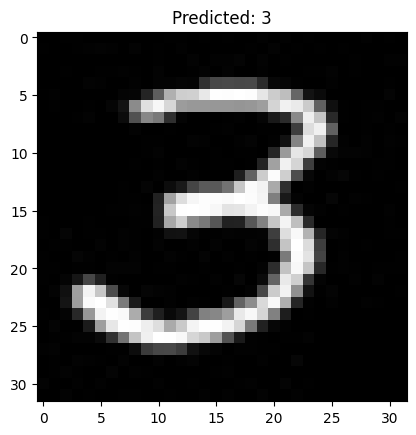

In [25]:
from tensorflow.keras.preprocessing import image

#get image from folder to colab
unseen_image_path = "/content/93.jpg" #new image goes here

#processing the image
img = image.load_img(unseen_image_path, target_size=image_size)
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

#prediction
pred_probs = model.predict(img_array)
pred_class_index = np.argmax(pred_probs, axis=1)[0]

class_names = list(train_data.class_indices.keys())
predicted_class = class_names[pred_class_index]

plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.show()